In [1]:
!pip install pandas matplotlib

Looking in indexes: http://pypi.douban.com/simple
     ---------------------------------------- 10.6/10.6 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 6.6 MB/s eta 0:00:00
  Using cached https://mirrors.cloud.tencent.com/pypi/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached https://mirrors.cloud.tencent.com/pypi/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
     -------------------------------------- 341.8/341.8 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 1.5 MB/s eta 0:00:00
  Using cached https://mirrors.clo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd # 引入Pandas库，按惯例起别名pd

# 以下两种效果一样，如果是网址，它会自动将数据下载到内存
# df = pd.read_excel('https://www.gairuo.com/file/data/dataset/team.xlsx')
df = pd.read_excel('team.xlsx') # 文件在notebook文件同一目录下
# 如果是CSV，使用pd.read_csv()，还支持很多类型的数据读取

In [2]:
df.head() # 查看前5条，括号里可以写明你想看的条数
df.tail() # 查看尾部5条
df.sample(5) # 随机查看5条

,name,team,Q1,Q2,Q3,Q4
28,Daniel,C,50,50,72,61
3,Eorge,C,93,96,71,78
76,Dexter,E,73,94,53,20
68,Hunter3,D,38,80,82,40
48,Louie,D,24,84,54,11


In [9]:
c = df.groupby("team")
type(c)

pandas.core.groupby.generic.DataFrameGroupBy

In [13]:
df.shape # (100, 6) 查看行数和列数
df.info() # 查看索引、数据类型和内存信息
df.describe() # 查看数值型列的汇总统计
df.dtypes # 查看各字段类型
df.axes # 显示数据行和列名
df.columns # 列名

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    100 non-null    object
 1   team    100 non-null    object
 2   Q1      100 non-null    int64 
 3   Q2      100 non-null    int64 
 4   Q3      100 non-null    int64 
 5   Q4      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


Index(['name', 'team', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [14]:
df.describe() # 查看数值型列的汇总统计

,Q1,Q2,Q3,Q4
count,100.000000,100.000000,100.000000,100.000000
mean,49.200000,52.550000,52.670000,52.780000
std,29.962603,29.845181,26.543677,27.818524
min,1.000000,1.000000,1.000000,2.000000
25%,19.500000,26.750000,29.500000,29.500000
50%,51.500000,49.500000,55.000000,53.000000
75%,74.250000,77.750000,76.250000,75.250000
max,98.000000,99.000000,99.000000,99.000000


In [15]:
df.set_index('name', inplace=True) # 建立索引并生效
df.head()

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86


In [16]:
# 选择多列
df[['team', 'Q1']] # 只看这两列，注意括号
df.loc[:, ['team', 'Q1']] # 和上一行效果一样

,team,Q1
name,,
Liver,E,89
Arry,C,36
Ack,A,57
Eorge,C,93
Oah,D,65
...,...,...
Gabriel,C,48
Austin7,C,21
Lincoln4,C,98


In [17]:
# 用指定索引选取
df[df.index == 'Liver'] # 指定姓名

# 用自然索引选择，类似列表的切片
df[0:3] # 取前三行
df[0:10:2] # 在前10个中每两个取一个
df.iloc[:10,:] # 前10个

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
Harlie,C,24,13,87,43
Acob,B,61,95,94,8
Lfie,A,9,10,99,37
Reddie,D,64,93,57,72


In [18]:
df.loc['Ben', 'Q1':'Q4'] # 只看Ben的四个季度成绩
df.loc['Eorge':'Alexander', 'team':'Q4'] # 指定行区间

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
Harlie,C,24,13,87,43
Acob,B,61,95,94,8
Lfie,A,9,10,99,37
Reddie,D,64,93,57,72
Oscar,A,77,9,26,67
Leo,B,17,4,33,79
Logan,B,9,89,35,65


In [ ]:
# 单一条件
df[df.Q1 > 90] # Q1列大于90的
df[df.team == 'C'] # team列为'C'的
df[df.index == 'Oscar'] # 指定索引即原数据中的name

# 组合条件
df[(df['Q1'] > 90) & (df['team'] == 'C')] # and关系
df[df['team'] == 'C'].loc[df.Q1>90] # 多重筛选

### 排序

In [20]:
df.sort_values(by='Q1') # 按Q1列数据升序排列
df.sort_values(by='Q1', ascending=False) # 降序

df.sort_values(['team', 'Q1'], ascending=[True, False]) # team升序，Q1降序

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Henry,A,91,15,75,17
Nathan,A,87,77,62,13
Dylan,A,86,87,65,20
Blake,A,78,23,93,9
...,...,...,...,...,...
Eli,E,11,74,58,91
Jude,E,8,45,13,65
Rory9,E,8,12,58,27


### 分组聚合

In [21]:
df.groupby('team').sum() # 按团队分组对应列相加
df.groupby('team').mean() # 按团队分组对应列求平均
# 不同列不同的计算方法
df.groupby('team').agg({'Q1': sum,  # 总和
                        'Q2': 'count', # 总数
                        'Q3':'mean', # 平均
                        'Q4': max}) # 最大值

,Q1,Q2,Q3,Q4
team,,,,
A,1066,17,51.470588,97
B,975,22,54.636364,99
C,1056,22,48.545455,98
D,860,19,65.315789,99
E,963,20,44.050000,98


In [25]:
df.groupby('team').sum() # 按团队分组对应列相加

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


### 数据转换

In [22]:
df.groupby("team").sum().T

team,A,B,C,D,E
Q1,1066,975,1056,860,963
Q2,639,1218,1194,1191,1013
Q3,875,1202,1068,1241,881
Q4,783,1136,1127,1199,1033


In [23]:
df.groupby("team").sum().stack()

team    
A     Q1    1066
      Q2     639
      Q3     875
      Q4     783
B     Q1     975
      Q2    1218
      Q3    1202
      Q4    1136
C     Q1    1056
      Q2    1194
      Q3    1068
      Q4    1127
D     Q1     860
      Q2    1191
      Q3    1241
      Q4    1199
E     Q1     963
      Q2    1013
      Q3     881
      Q4    1033
dtype: int64

In [24]:
df.groupby("team").sum().unstack()

    team
Q1  A       1066
    B        975
    C       1056
    D        860
    E        963
Q2  A        639
    B       1218
    C       1194
    D       1191
    E       1013
Q3  A        875
    B       1202
    C       1068
    D       1241
    E        881
Q4  A        783
    B       1136
    C       1127
    D       1199
    E       1033
dtype: int64

### 增加列

In [26]:
df['one'] = 1 # 增加一个固定值的列
df

,team,Q1,Q2,Q3,Q4,one
name,,,,,,
Liver,E,89,21,24,64,1
Arry,C,36,37,37,57,1
Ack,A,57,60,18,84,1
Eorge,C,93,96,71,78,1
Oah,D,65,49,61,86,1
...,...,...,...,...,...,...
Gabriel,C,48,59,87,74,1
Austin7,C,21,31,30,43,1
Lincoln4,C,98,93,1,20,1


In [27]:
# 增加总成绩列
df['total'] = df.Q1+df.Q2+df.Q3+df.Q4
df

,team,Q1,Q2,Q3,Q4,one,total
name,,,,,,,
Liver,E,89,21,24,64,1,198
Arry,C,36,37,37,57,1,167
Ack,A,57,60,18,84,1,219
Eorge,C,93,96,71,78,1,338
Oah,D,65,49,61,86,1,261
...,...,...,...,...,...,...,...
Gabriel,C,48,59,87,74,1,268
Austin7,C,21,31,30,43,1,125
Lincoln4,C,98,93,1,20,1,212


In [29]:
df['total'] = df.sum(axis=1) # 可以把所有为数字的列相加
df

D:\rj\install_rj\PYTHON\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,team,Q1,Q2,Q3,Q4,one,total
name,,,,,,,
Liver,E,89,21,24,64,1,596
Arry,C,36,37,37,57,1,503
Ack,A,57,60,18,84,1,659
Eorge,C,93,96,71,78,1,1016
Oah,D,65,49,61,86,1,785
...,...,...,...,...,...,...,...
Gabriel,C,48,59,87,74,1,806
Austin7,C,21,31,30,43,1,377
Lincoln4,C,98,93,1,20,1,638


In [31]:
df['one'] = 1 # 增加一个固定值的列
df['total'] = df.Q1 + df.Q2 + df.Q3 + df.Q4 # 增加总成绩列
# 将计算得来的结果赋值给新列
df['total'] = df.loc[:,'Q1':'Q4'].apply(lambda x:sum(x), axis=1)
df['total'] = df.sum(axis=1) # 可以把所有为数字的列相加
df['avg'] = df.total/4 # 增加平均成绩列
df

D:\rj\install_rj\PYTHON\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,team,Q1,Q2,Q3,Q4,one,total,avg
name,,,,,,,,
Liver,E,89,21,24,64,1,496.25,124.0625
Arry,C,36,37,37,57,1,418.75,104.6875
Ack,A,57,60,18,84,1,548.75,137.1875
Eorge,C,93,96,71,78,1,846.25,211.5625
Oah,D,65,49,61,86,1,653.75,163.4375
...,...,...,...,...,...,...,...,...
Gabriel,C,48,59,87,74,1,671.25,167.8125
Austin7,C,21,31,30,43,1,313.75,78.4375
Lincoln4,C,98,93,1,20,1,531.25,132.8125


### 统计分析

In [33]:
df.mean() # 返回所有列的均值
df.mean(1) # 返回所有行的均值，下同
df.corr() # 返回列与列之间的相关系数
df.count() # 返回每一列中的非空值的个数
df.max() # 返回每一列的最大值
df.min() # 返回每一列的最小值
df.median() # 返回每一列的中位数
df.std() # 返回每一列的标准差
df.var() # 方差
df.mode() # 众数

D:\rj\install_rj\PYTHON\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
D:\rj\install_rj\PYTHON\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
D:\rj\install_rj\PYTHON\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
D:\rj\install_rj\PYTHON\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping 

,team,Q1,Q2,Q3,Q4,one,total,avg
0,B,9.0,34,87.0,68.0,1.0,496.25,124.0625
1,C,NaN,38,NaN,NaN,NaN,NaN,NaN


### 绘图

<AxesSubplot:xlabel='name'>

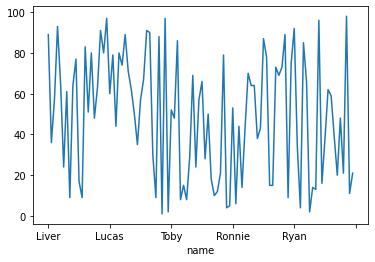

In [34]:
df['Q1'].plot() # Q1成绩的折线分布

<AxesSubplot:>

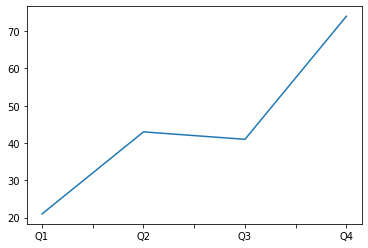

In [35]:
df.loc['Ben','Q1':'Q4'].plot() # ben四个季度的成绩变化

<AxesSubplot:>

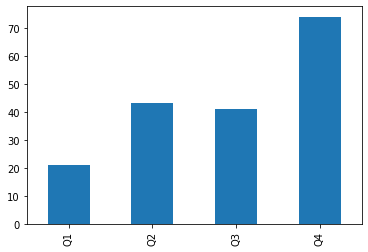

In [37]:
df.loc['Ben','Q1':'Q4'].plot.bar()

<AxesSubplot:>

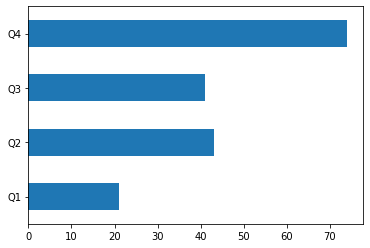

In [38]:
df.loc['Ben','Q1':'Q4'].plot.barh()

<AxesSubplot:>

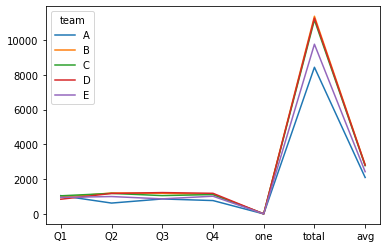

In [39]:
# 各Team四个季度总成绩趋势
df.groupby('team').sum().T.plot()

<AxesSubplot:ylabel='Q1'>

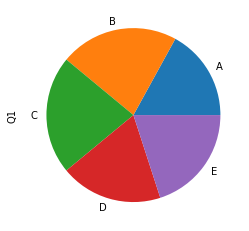

In [40]:
# 各组人数对比
df.groupby('team').count().Q1.plot.pie()

### 导出

In [41]:
df.to_excel('team-done.xlsx') # 导出 Excel文件
df.to_csv('team-done.csv') # 导出 CSV文件